<h1><center>Laboratorio 4: El Pandas no muerde (act. I) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:Marcelo Rojas
- Nombre de alumno 2:Sebastián Sanhueza


### **Link de repositorio de GitHub:** `https://github.com/Marcelorojasb/MDS7202`

### Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **Ausentes tienen nota máxima 6.0**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
# !pip install --upgrade plotly
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler

# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos.
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados.




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Colab Notebooks/lab4/'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


## 1.1 Carga e Inspección de Datos [1.5 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>


*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset.


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [4]:
df_grades = pd.read_json(path+"students_grades.json")

# Cambiamos el tipo de datos de las últimas tres columnas a float considerando que los datos sin score("") se conviertan en NaN
df_grades[['math score','reading score','writing score']] = df_grades[['math score','reading score','writing score']].apply(pd.to_numeric, errors='coerce')


<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **875** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **875** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas.

**To-Do**
1. [X] Imprimir un mensaje con las dimensiones del Dataframe.
2. [X] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [X] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [X] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [X] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [X] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [X] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [X] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
9. [X] A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
10. [ ] Finalmente responda la siguiente pregunta:

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? (), comente esto en la celda ubicada debajo de **justificación**.

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c)

**Respuesta:**

In [5]:
def exploratory_data_analysis(dataframe):
    # Imprime las dimensiones del Dataframe
    dim = dataframe.shape
    print(f'1.- El DataFrame tiene {dim[0]} filas y {dim[1]} columnas')

    # Imprime los nombres de las columnas del Dataframe
    columns = list(dataframe.columns)
    print(f'\n2.- El DataFrame esta compuesto por las siguientes columnas:{columns}')

    # Muestra algunas filas del Dataframe
    print('\n3.- Ejemplos de filas del DataFrame:')
    first_5 = dataframe.head(5)
    print('\nPrimeras 5 filas:')
    display(first_5)
    last_5 = dataframe.tail(5)
    print('\nÚltimas 5 filas:')
    display(last_5)
    random_5 = dataframe.sample(5)
    print('\nMuestreo aleatorio de 5 filas:')
    display(random_5)

    # Muestra una descripción rápida de las variables numéricas del Dataframe
    num_decription = dataframe.describe() # La función describe() por default entrega una descripción solo de las columnas numéricas
    print('\n4.- Descripción numérica del Dataframe:')
    display(num_decription)

    # Muestra la cantidad total de valores nulo por columna del Dataframe
    print('\n5.- Cantidad de valores nulos por columna:')
    print(dataframe.isna().sum())

    # Muestra la cantidad de valores únicos por columna del Dataframe
    print('\n6.- Cantidad de valores únicos por columna:')
    print(dataframe.nunique())

    # Muestra el total de filas con nombres duplicados
    name_duplicated = dataframe['names'].duplicated().sum()
    print(f'\n7.- Presenta un total de {name_duplicated} filas con nombres duplicados.')

    # Muestras las filas del Dataframe que contienen nombres duplicados
    rows_duplicated = dataframe.loc[dataframe['names'].duplicated(), :]
    print('\n8.- Las filas con nombres duplicados son:')
    display(rows_duplicated)

    # Plotea un boxplot para cada columna correspondiente a una nota del estudiante
    print('\n9.- Boxplot de notas:')
    dataframe[['math score', 'reading score', 'writing score']].plot.box()

1.- El DataFrame tiene 1400 filas y 9 columnas

2.- El DataFrame esta compuesto por las siguientes columnas:['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0



Últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



Muestreo aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
400,Stanley Mcgahan,male,group C,associate's degree,standard,none,193.0,NaN,142.0
495,Marguerite Ramos,female,group C,bachelor's degree,standard,none,86.0,92.0,87.0
992,Eleanor Bond,female,group E,associate's degree,standard,none,87.0,94.0,95.0
244,Gary Spencer,male,group B,some high school,standard,completed,51.0,54.0,41.0
1053,John Ponce,male,group B,bachelor's degree,free/reduced,none,88.0,75.0,76.0



4.- Descripción numérica del Dataframe:


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000



5.- Cantidad de valores nulos por columna:
names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64

6.- Cantidad de valores únicos por columna:
names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

7.- Presenta un total de 247 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0



9.- Boxplot de notas:


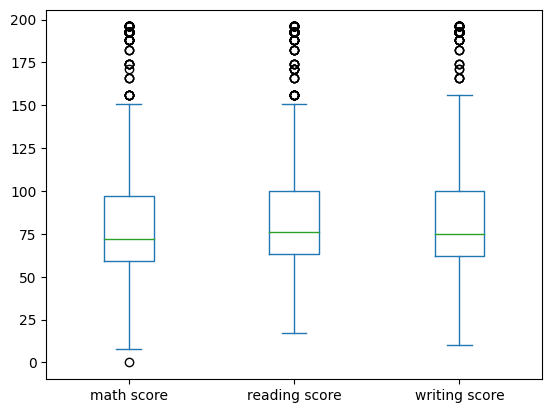

In [ ]:
exploratory_data_analysis(df_grades)

**Justificación:**

```
Primero que todo, se puede observar en los resultados de la descripción numérica de los atributos de score que la cantidad total de cada uno de ellos no corresponde a 1400, el cual es la cantidad total de datos, esto se debe a que existen datos nulos o NaN, lo cual se puede verificar en la pregunta 5, en donde se puede observar claramente como los únicos atributos que presentan datos nulos son los numéricos, en particular "math score" tiene 40, "reading score" tiene 40 también y "writing score" tiene 47 datos nulos. Asimismo, se pudo apreciar en los resultados de la pregunta 4 que el valor máximo en los tres atributos de score supera el 100%, en particular alcanzan un valor de 196%, lo cual es un error en el registro de las calificaciones dado que la escala de estas es entre 0% y 100%.

Por otra parte, en la pregunta 7 se puede vrificar que existen un total de 247 nombres duplicados, es decir que un mismo estudiante ha sido registrado dos veces con atributos diferentes, lo cual es un error que afecta gravemente al registro de matriculas de los estudiantes, además en la tabla de la pregunta 6 se puede evidenciar que existen un total de 1153 alumnos únicos registrados lo cual concuerda con la candidad de total de datos de la base de datos y la cantidad de nombres duplicados. Junto con esto, se puede observar en la tabla de la pregunta 8 que muchos de los registros con nombres duplicados presentan alguna calificación por sobre el 100%, de lo cual se puede inferir que existe alguna relación en que los registros duplicados presentan errores en la escala de las evaluaciones.

Finalmente, en el boxplot generado se puede analizar primero que todo la distribución de los datos en cada uno de los tres atributos. En "math score" se puede observar que el primer cuartil se encuentra por debajo de un valor entre 50 y 75 mientras que el cuarto cuartil se encuentra por encima de un valor cercano a 100, entre estos dos valores se encuentra el rango intercuartil, es decir el 50% de los datos que se encuentran entorno al centro de la distribución, en la cual se puede observar que la mediana no es central en la caja, de hecho tiene valores un poco menores a 75, esto implica que la distribución de los datos en este atributo no son simétricos, de hecho la diferencia entre el tercer cuartil y el segundo cuartil es mayor que la diferencia de este último con el primer cuertil, lo cual se conoce como positive skew o sesgo positivo. En general, los otros dos atributos presentan características similares, tanto "reading score" como "writing score" presentan una dsitribución asimétrica de tipo positive skew, sin embargo, el rango de los cuartiles y la media difieren un poco, ambos presentan una mediana un poco mayor que la de "math score", siendo la de "reading score" la mayor entre los tres y es la que presenta los cuartiles más altos también, aunque la diferencia es mínima.

Por otra parte, la característica más destacable de los boxplot para los tres atributos es la cantidad de outliers, en general todos presentaron una gran acumulación de outliers de valores altos, superiores a 150, mientras que el atributo de "math score" presentó un outlier cercano a 0. Estos son datos que se escapan de los rangos y comportamientos normales de las distribuciones de cada atributo, esto es debido a que la escala de las calificaciones se encuentra entre 0% y 100%, por lo que cualquier valor que se escape de ese rango se considera un dato anómalo que puede estar asociado a algún error de registro.
```

**Respuesta Esperada:**

1.- El DataFrame tiene 1400 filas y 9 columnas

2.- El DataFrame esta compuesto por las siguientes columnas:['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0



Últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



Muestreo aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1330,Kelly Greer,female,group C,associate's degree,free/reduced,none,53.0,61.0,62.0
996,Jerry Douglas,male,group A,some high school,standard,none,196.0,133.0,36.0
630,Julio Fuller,male,group D,high school,standard,none,72.0,66.0,66.0
658,Cathy Kuhl,female,group E,high school,free/reduced,completed,196.0,142.0,NaN
852,Stella Stephens,female,group D,master's degree,standard,none,74.0,79.0,82.0



4.- Descripción numérica del Dataframe:


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000



5.- Cantidad de valores nulos por columna:
names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64

6.- Cantidad de valores únicos por columna:
names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

7.- Presenta un total de 247 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0



9.- Boxplot de notas:


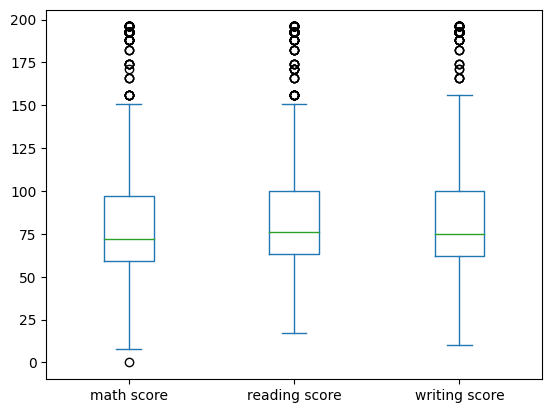

In [6]:
exploratory_data_analysis(df_grades)

## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>


En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Habiendo limpiado el `DataFrame`, compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [X] Crear función que permita limpiar el dataset.
- [X] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


In [7]:
def clean_data(dataframe):

     # Elimina los datos fuera de rango en los atributos de score
    ranges= ((dataframe['math score'] >= 0.0) & (dataframe['math score'] <= 100.0) &
                 (dataframe['reading score'] >= 0.0) & (dataframe['reading score'] <= 100.0) &
                 (dataframe['writing score'] >= 0.0) & (dataframe['writing score'] <= 100.0))

    dataframe = dataframe.loc[ranges]

    # Elimina las filas duplicadas basadas en el atributo "names"
    dataframe = dataframe.drop_duplicates(subset="names", keep="first")


    # Elimina las filas con valores NaN
    dataframe = dataframe.dropna()

    # Reseteamos los índices
    dataframe = dataframe.reset_index(drop=True)

    return dataframe


**Respuesta:**

In [8]:
df_grades = clean_data(df_grades)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
2,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
3,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
4,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
996,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
998,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


> Utilice la función creada en el punto 1.1 para verificar sus resultados.

1.- El DataFrame tiene 1000 filas y 9 columnas

2.- El DataFrame esta compuesto por las siguientes columnas:['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
2,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
3,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
4,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0



Últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
996,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
998,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
999,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



Muestreo aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
748,Robert Strain,male,group C,associate's degree,free/reduced,none,55.0,61.0,54.0
113,Audrey Mcdonald,female,group D,some college,standard,none,69.0,77.0,77.0
7,Mikki Amaya,female,group A,high school,free/reduced,completed,34.0,48.0,41.0
416,John Ratcliff,male,group D,high school,standard,none,54.0,52.0,52.0
986,Robert Morrison,male,group D,some college,standard,completed,100.0,97.0,99.0



4.- Descripción numérica del Dataframe:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



5.- Cantidad de valores nulos por columna:
names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

6.- Cantidad de valores únicos por columna:
names                          1000
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       81
reading score                    72
writing score                    77
dtype: int64

7.- Presenta un total de 0 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score



9.- Boxplot de notas:


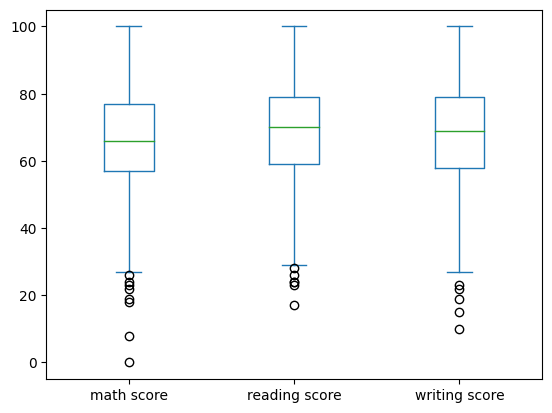

In [9]:
# Utilizamos la función creada en la parte 1.1
exploratory_data_analysis(df_grades)

**Justificación:**

```
Primero que todo, la función se diseñó tal que primero eliminara todos los datos que tuvieran scores fuera del rango de 0 y 100, luego que eliminara los datos que tuvieran el nombre duplicado y finalmente que eliminara los datos que tuvieran valores NaN. Se consideró este orden, ya que si se eliminaban primero los datos con nombre duplicado y luego los datos con scores fuera de los rangos se obtendría un dataset con 875 registros, pero se incurriría en un error, ya que primero se estarían eliminando los datos con nombre duplicados, pero que aparecen por segunda vez, es decir que el primer dato con el nombre duplicado no se eliminaría, solamente el segundo. Esto podría provocar que se eliminen datos que tienen valores de score dentro de los rangos y se mantuvieran los que tienen un score fuera de los rangos permitidos, lo cual implicaría que se eliminara todo registro de un solo estudiante. Sin embargo, si se eliminan los datos con valores de score fuera de rango permitiría que luego solamente se eliminen datos con nombre duplicado que tengas estos atributos dentro del rango, lo cual evitaría que se elimine a algún estudiante por completo.

Luego de implementar la función se evaluó el resultado utilizando la función diseñada en la parte 1.1, en donde se pudo observar que se obtuvo un total de 1000 datos de los 1400 datos que se tenían en un inicio, se evidenció que los valores de score estuvieran en el rango de 0% y 100% a partir de la tabla en la pregunta 4, además de que no existieran registros con valores NaN en la pregunta 5 ni datos con el nombre duplicado a partir de las preguntas 6 y 7. Por último, se pudo observar en el boxplot como cambió la distribución de los datos al compararlo con el boxplt obtenido en la primera parte, en particular se pudo observar que los datos viven dentro del rango de 0 y 100, además el rango intercuartil disminuyó para cada atributo, ya que en un inicio este vivía entre un valor cercano a 75 y un valor cercano a 100, sin embargo en este nuevo dataframe el 50% de los valores centrales de la distribución viven en un rango entre un valor cercano a 70 y un valor cercano a 80. Asimismo, se pudo evidenciar que los outliers de valores altos fueron eliminados y ahora la mayor cantidad de outliers se concentran en valores por debajo al primero cuartil, lo cual se debe a que el rango intercuartil es más pequeño y lo datos outliers se consideran luego de un rango de 1.5 veces el rango intercuartil, sin embargo estos se mantienen dentro del rango deseado asi que no perjudicarían demasiado al estudio de los datos.
```

## 1.3 Trabajando con Datos

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas del dataframe y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [X] Tranforme los valores a la escala chilena.

**Respuesta:**

In [10]:
def nota_chilena(dataframe_in, columna):
  assert type(columna) == str
  # Copiamos los datos del Dataframe
  dataframe = dataframe_in.copy()
  # Transforma los datos de la columna en dataframe_in a la escala de notas chilena
  dataframe[columna] = (dataframe[columna]*0.06 + 1.0).round(2)

  return dataframe


In [11]:
# Transformamos la escala de cada columna
df_grades = nota_chilena(df_grades, 'math score')
df_grades = nota_chilena(df_grades, 'reading score')
df_grades = nota_chilena(df_grades, 'writing score')
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


### 1.3.2 Obtención de promedio de alumnos [0.5]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del `DataFrame` original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [X] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el `DataFrame` original.


**Respuesta:**

In [12]:
def alumnos_promedio(dataframe_in):
  # Copiamos los datos del Dataframe
  dataframe = dataframe_in.copy()

  # Genera un Dataframe con el cálculo de los promedios con cada asignatura para cada registro
  means = dataframe[['math score','reading score','writing score']].mean(axis=1)

  # Anexa el Dataframe con los promedios como una nueva columna llamana 'GPA'
  dataframe['GPA'] = means

  return dataframe


In [13]:
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


**Respuesta Esperada:**

In [14]:
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


### 1.3.3 Reprobados y Destacados [1.5 Punto, 0.5 Cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes:
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [X] Obtener DataFrame con los alumnos que reprobaron el año.
- [X] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [X] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [15]:
def reprobados_destacados(dataframe_in):
    dataframe1 = dataframe_in.copy()
    dataframe2 = dataframe_in.copy()
    dataframe3 = dataframe_in.copy()

    # Genera un Dataframe con lo alumnos que reprobaron el año
    dataframe1 = dataframe1[dataframe1['GPA']<4.0]
    dataframe1 = dataframe1.reset_index(drop=True)

    # Genera un Dataframe similar al original marcando con una R a los alumnos reprobados
    dataframe2.loc[dataframe2['GPA']<4.0,'GPA']='R'

    # Genera un Dataframe con los alumnos destacados ordenados de mayor a menor
    dataframe3 = dataframe3.loc[((dataframe3['math score'] > 5.8) & (dataframe3['reading score'] > 5.8) & (dataframe3['writing score'] > 5.8))]
    dataframe3 = dataframe3.sort_values('GPA', ascending=False) # Ordena a los alumnos de mayor a menor de acuerdo a su GPA
    dataframe3 = dataframe3.reset_index(drop=True)

    return dataframe1,dataframe2,dataframe3



In [16]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
2,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
3,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
4,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
98,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
99,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
100,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
101,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [17]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [18]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.00
1,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.00
2,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.00
3,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.98
4,Angela Cressey,female,group D,some college,standard,none,6.88,7.00,6.94,6.94
...,...,...,...,...,...,...,...,...,...,...
105,Rolando Widmer,male,group C,high school,standard,completed,5.92,6.04,5.92,5.96
106,Lucille Stanphill,female,group C,high school,standard,none,5.86,6.04,5.92,5.94
107,Steven Kelly,male,group D,some college,standard,none,5.86,5.92,6.04,5.94
108,Peter Perez,male,group D,master's degree,standard,none,5.86,5.86,6.04,5.92


### 1.3.4 Consultas de Alumnos [0.5 Puntos]

Algunos padres (extremadamente entrometidos y...) preocupados por el desempeño de sus hijos, desean saber estos han aprobado o no el año. Como la tarea de buscar a mano cada uno de estos alumnos en el `DataFrame` resulta demasiado tedioso, el rector le solicita crear una función que tenga como entrada el `DataFrame` donde se realizará la busqueda y una lista con los nombres de los alumnos, luego la función deberá retornar un `DataFrame` con los nombres de los alumnos y el promedio general de cada uno.

Creada la función busque el promedio general de los siguientes alumnos en el segundo Data frame creado en la sección 1.3.3:

`['Lucille Stanphill','Marcus Mcfarland', 'Matthew Freeman', 'Dana Mojica', 'Paul Hyder', 'Jeffrey Korn', 'Robert Strain',
'Ronald Jett', 'Lorena Reed', 'Hazel Posey']`

**Hint:** Puede serle de utilidad utilizar `isin()`.

**Respuesta:**

In [19]:
def consulta_gpa(dataframe_in, lista_alumnos):
    dataframe_out = dataframe_in.loc[dataframe_in['names'].isin(lista_alumnos)]
    return dataframe_out[['names','GPA']]


lista_alumnos = [
    "Lucille Stanphill",
    "Marcus Mcfarland",
    "Matthew Freeman",
    "Dana Mojica",
    "Paul Hyder",
    "Jeffrey Korn",
    "Robert Strain",
    "Ronald Jett",
    "Lorena Reed",
    "Hazel Posey",
]
consulta_gpa(dataframe2, lista_alumnos)

,names,GPA
203,Lucille Stanphill,5.94
396,Marcus Mcfarland,4.86
446,Matthew Freeman,R
449,Dana Mojica,R
604,Paul Hyder,6.2
647,Jeffrey Korn,4.54
748,Robert Strain,4.4
752,Ronald Jett,R
754,Hazel Posey,R
849,Lorena Reed,R


### 1.3.5 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [20]:
# Código para quintiles
# La variable que contenga los quintiles debe llamarse GPA cuantiles para que el gráfico funcione.
df_grades['GPA cuantiles'] = pd.qcut(df_grades.GPA, q=5,
                        labels=['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])

# Código de gráfico
fig = px.scatter(
    df_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://gifdb.com/images/high/orange-cat-cat-walking-with-two-legs-xlgf7qx4i24da74f.gif" width="400">
</p>


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>